In [48]:
import iris
import datetime as dt
import os
import iris.plot as iplt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import numpy as np
from matplotlib.colors import LogNorm

In [128]:
t0 = dt.datetime(1967,7,18)
time = "19670718"
path = "/g/data/tp28/dev/barpa/prod/eh6215/cg282_ACCESS-CM2_historical_1960_sciB/19670701T0000Z/nc"
name="-CMIP6-ACCESS-CM2-historical-r4i1p1f1-barpa_r-v1-"#197003310015-197004010000.nc
cx = iris.Constraint(longitude=lambda x: 110<=x<=160)
cy = iris.Constraint(latitude=lambda x: -55<=x<=-10)
ct = iris.Constraint(time = lambda t: t.point.minute==30)

c_path = "/g/data/r87/DRSv3/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r4i1p1f1/3hr/{var}/gn/latest/{var}_3hr_ACCESS-CM2_historical_r4i1p1f1_gn_19600101*.nc"

In [130]:
varlist = {'pr':('av_prcp_rate','SLV1H'),'u':('uwnd10m_b','SLV15M'),'v':('vwnd10m_b','SLV15M'),'q':("temp_scrn","SLV15M")}
barpa = {}
for var in varlist:
    barpa[var] = iris.load_cube(os.path.join(path,varlist[var][1],varlist[var][0]+name+time+"*"),cx&cy&ct)
    

In [132]:
cmip = {}
varlist = {'pr':('pr','SLV1H'),'u':('uas','SLV15M'),'v':('vas','SLV15M'),'q':("tas","SLV15M")}
ct=iris.Constraint(time=lambda t: (t.point.year,t.point.month,t.point.day) == (1967,7,18))

for var in varlist:
    cmip[var] = iris.load_cube(c_path.format(var=varlist[var][0]),ct&cx&cy)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'pr'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'uas'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'vas'
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(


In [137]:
barpa['pr'].units='mm/s'
barpa['pr'].convert_units('mm/hr')
cmip['pr'].units='mm/s'
cmip['pr'].convert_units('mm/hr')
print(barpa)
print(cmip)

{'pr': <iris 'Cube' of precipitation_flux / (mm/hr) (time: 24; latitude: 292; longitude: 323)>, 'u': <iris 'Cube' of x_wind / (m s-1) (time: 24; latitude: 291; longitude: 324)>, 'v': <iris 'Cube' of y_wind / (m s-1) (time: 24; latitude: 291; longitude: 324)>, 'q': <iris 'Cube' of air_temperature / (K) (time: 24; latitude: 292; longitude: 323)>}
{'pr': <iris 'Cube' of precipitation_flux / (mm/hr) (time: 8; latitude: 38; longitude: 28)>, 'u': <iris 'Cube' of eastward_wind / (m s-1) (time: 8; latitude: 38; longitude: 27)>, 'v': <iris 'Cube' of northward_wind / (m s-1) (time: 8; latitude: 37; longitude: 28)>, 'q': <iris 'Cube' of air_temperature / (K) (time: 8; latitude: 38; longitude: 28)>}


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


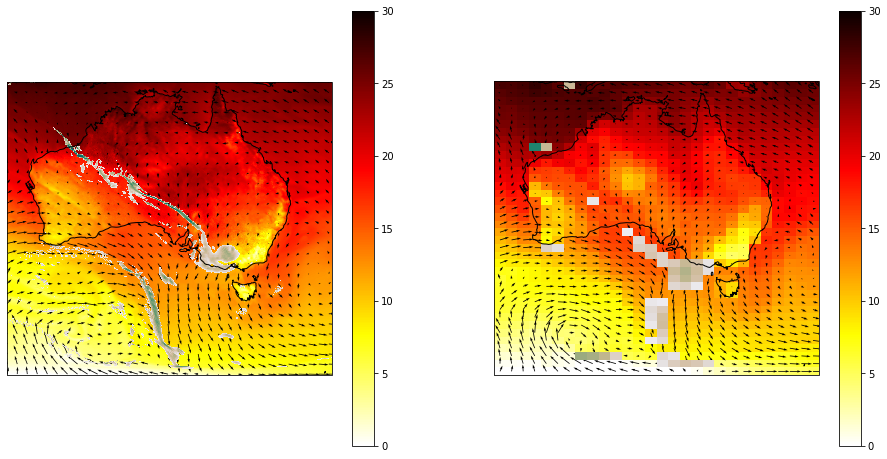

In [139]:
plt.figure(figsize=(16,8))
i,k=0,10
#cx = iris.Constraint(longitude=lambda x: 142<=x<=152)
#cy = iris.Constraint(latitude=lambda x: -42<=x<=-32)
p = barpa['pr'][i].copy().extract(cx&cy)
p.data = np.ma.masked_array(p.data,p.data<1)
ax=plt.subplot(121,projection=ccrs.PlateCarree())
iplt.pcolormesh(barpa['q'][i].extract(cx&cy)-273.15,vmin=0,vmax=30,cmap='hot_r')
plt.colorbar()
iplt.quiver(barpa['u'][i].extract(cx&cy)[::k,::k],barpa['v'][i].extract(cx&cy)[::k,::k])
iplt.pcolormesh(p.extract(cx&cy),cmap=cmocean.cm.rain,norm=LogNorm(vmin=1,vmax=100))
ax.coastlines()
i,k=i//3,1
p = cmip['pr'][i].copy().extract(cx&cy)
p.data = np.ma.masked_array(p.data,p.data<1)
ax=plt.subplot(122,projection=ccrs.PlateCarree())
iplt.pcolormesh(cmip['q'][i].extract(cx&cy)-273.15,vmin=0,vmax=30,cmap='hot_r')
plt.colorbar()
iplt.quiver(cmip['u'][i][::k,::k].extract(cx&cy).regrid(p,iris.analysis.Linear()),cmip['v'][i][::k,::k].extract(cx&cy).regrid(p,iris.analysis.Linear()))
iplt.pcolormesh(p,cmap=cmocean.cm.rain,norm=LogNorm(vmin=1,vmax=100))
ax.coastlines()